In [77]:
import nltk
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import names
from sklearn.cluster import KMeans



sns.set(rc={'figure.figsize':(11.7,8.27)})

In [9]:
# large download for the entire nltk corpus
#!python -m nltk.downloader all

In [10]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer

In [12]:
porter_stemmer = PorterStemmer()
porter_stemmer.stem('consolingly')

'consolingli'

In [13]:
lancaster_stemmer = LancasterStemmer()
lancaster_stemmer.stem('consolingly')

'consol'

In [14]:
snowball_stemmer = SnowballStemmer(language='english')
snowball_stemmer.stem('consolingly')

'consol'

In [18]:
from nltk.stem import WordNetLemmatizer
lemmatiser = WordNetLemmatizer()
print(lemmatiser.lemmatize('consolingly'))
print(lemmatiser.lemmatize('templates'))

consolingly
template


***

***

from sklearn.datasets import fetch_20newsgroups

In [20]:
groups = fetch_20newsgroups(data_home='../data/')

In [24]:
groups.keys()

dict_keys(['target_names', 'description', 'data', 'target', 'DESCR', 'filenames'])

In [30]:
groups['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [31]:
np.unique(groups.target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [54]:
def hist(x,xlab='',ylab='',title=''):
    sns.distplot(x)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    plt.show()

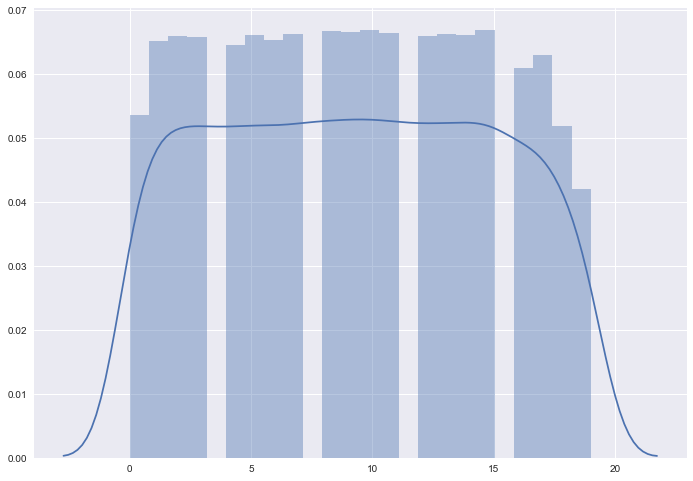

In [55]:
hist(groups.target)

In [49]:
counter = CountVectorizer(stop_words='english', max_features=500)

In [53]:
print(counter.get_feature_names())  #500 by default

['00', '000', '0d', '0t', '10', '100', '11', '12', '13', '14', '145', '15', '16', '17', '18', '19', '1993', '1d9', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '34u', '35', '40', '45', '50', '55', '80', '92', '93', '__', '___', 'a86', 'able', 'ac', 'access', 'actually', 'address', 'ago', 'agree', 'al', 'american', 'andrew', 'answer', 'anybody', 'apple', 'application', 'apr', 'april', 'area', 'argument', 'armenian', 'armenians', 'article', 'ask', 'asked', 'att', 'au', 'available', 'away', 'ax', 'b8f', 'bad', 'based', 'believe', 'berkeley', 'best', 'better', 'bible', 'big', 'bike', 'bit', 'black', 'board', 'body', 'book', 'box', 'buy', 'ca', 'california', 'called', 'came', 'canada', 'car', 'card', 'care', 'case', 'cause', 'cc', 'center', 'certain', 'certainly', 'change', 'check', 'children', 'chip', 'christ', 'christian', 'christians', 'church', 'city', 'claim', 'clinton', 'clipper', 'cmu', 'code', 'college', 'color', 'colorado', 'columbia', '

In [50]:
transformed = counter.fit_transform(groups.data)

In [81]:
from functools import partial

log_count_hist = partial(hist, 
                         xlab='Log Count',
                         ylab = 'Frequency',
                         title = 'Distribution Plot of Word Counts')

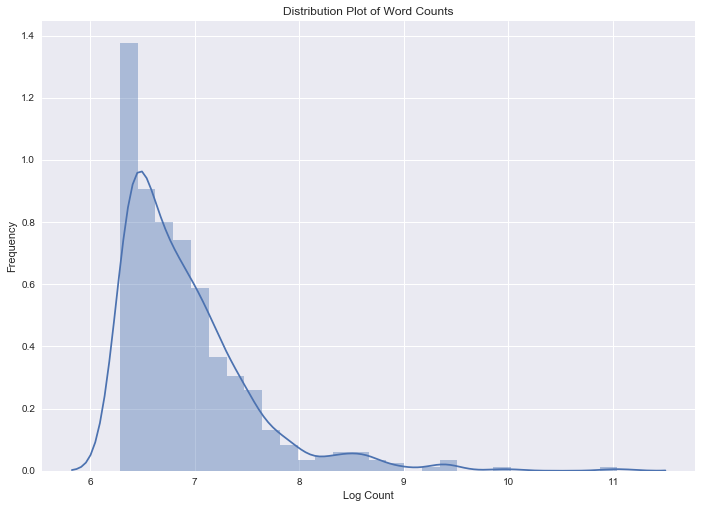

In [82]:
log_count_hist(np.log(transformed.toarray().sum(axis=0)))

***

***

In [71]:
def letters_only(abc):
    return abc.isalpha()

In [72]:
possible_names = set(names.words()) 

In [73]:
cleaned = []
for textpiece in groups.data:
    cleaned.append(' '.join([lemmatiser.lemmatize(word.lower()) for word in textpiece.split()
                    if letters_only(word) and word not in possible_names]))
    
    
    
    

In [74]:
cleaned[0]

'my what car is university of college i wa wondering if anyone out there could enlighten me on this car i saw the other it wa a sport looked to be from the late early it wa called a the door were really in the front bumper wa separate from the rest of the this is all i if anyone can tellme a model engine year of where this car is or whatever info you have on this funky looking please il brought to you by your neighborhood lerxst'

In [75]:
counts = counter.fit_transform(cleaned)  #modifies previous counter

In [76]:
print(counter.get_feature_names())

['able', 'accept', 'access', 'according', 'act', 'action', 'actually', 'add', 'address', 'ago', 'agree', 'algorithm', 'allow', 'american', 'anonymous', 'answer', 'anybody', 'apple', 'application', 'apr', 'arab', 'area', 'argument', 'armenian', 'article', 'ask', 'asked', 'assume', 'atheist', 'attack', 'attempt', 'available', 'away', 'bad', 'based', 'basic', 'belief', 'believe', 'best', 'better', 'bible', 'big', 'bike', 'bit', 'black', 'board', 'body', 'book', 'box', 'build', 'bus', 'business', 'buy', 'ca', 'california', 'called', 'came', 'car', 'card', 'care', 'carry', 'case', 'cause', 'center', 'certain', 'certainly', 'chance', 'change', 'check', 'child', 'chip', 'christian', 'church', 'city', 'claim', 'clear', 'clipper', 'code', 'college', 'color', 'come', 'coming', 'command', 'comment', 'common', 'communication', 'company', 'computer', 'computing', 'consider', 'considered', 'contact', 'control', 'controller', 'copy', 'correct', 'cost', 'country', 'couple', 'course', 'cover', 'create'

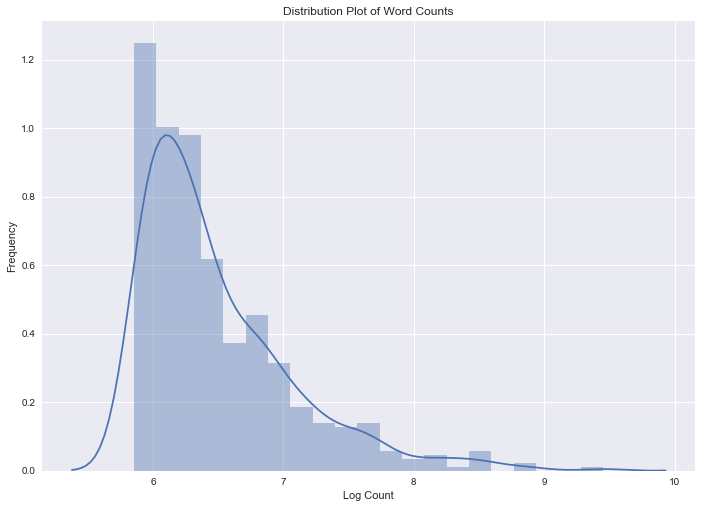

In [85]:
log_count_hist(np.log(counts.toarray().sum(axis=0)))

***

***

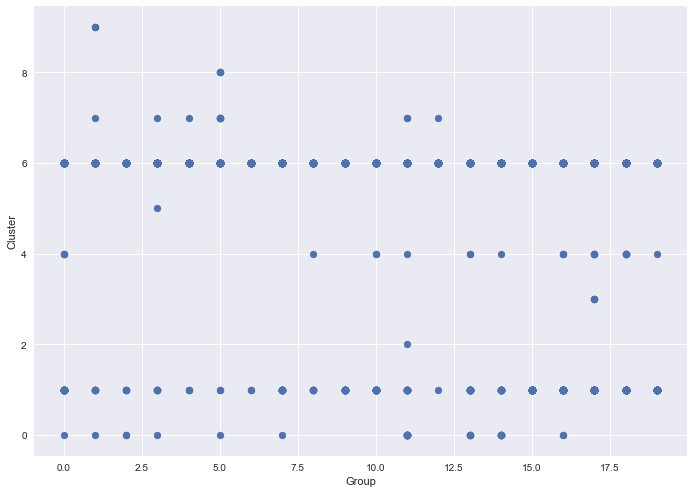

In [88]:
km = KMeans(n_clusters=10)
km.fit(counts)
labels = groups.target
plt.scatter(labels, km.labels_)
plt.xlabel('Group')
plt.ylabel('Cluster')
plt.show()

***

***

In [87]:
from sklearn.decomposition import NMF

In [93]:
nmf = NMF(n_components=100, random_state=55).fit(counts)

In [96]:
nmf.components_

array([[ 0.00531842,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.99644305,  0.30000933,  0.09650938, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.0416125 ,  0.        ,  0.        , ...,  0.        ,
         0.04263135,  0.        ],
       [ 0.        ,  0.        ,  0.0647213 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.16923213,  0.07532634,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [104]:
for topic_id, topic in enumerate(nmf.components_):
    label = '{}: '.format(topic_id)
    print(label, " ".join([counter.get_feature_names()[i]
                    for i in topic.argsort()[:-15:-1]]))

0:  wa did thought later left took order seen fact taken talking place sent end
1:  db bit data stuff place add time line special north rule code case run
2:  version color free available better display image current bit note try site view size
3:  file section information write change output source number entry space ftp current start check
4:  disk drive hard controller support card board head includes high apr note data speed
5:  entry program rule source number info email build section size attempt sure previous line
6:  new york service sale change study result early communication old small lost provide care
7:  image software user display free support color include line using different work set pc
8:  server using support screen display mouse application memory running source set lot faq code
9:  gun united control house second american national issue period provide command certain weapon report
10:  hockey league team division game player san final available american play nation

***

***